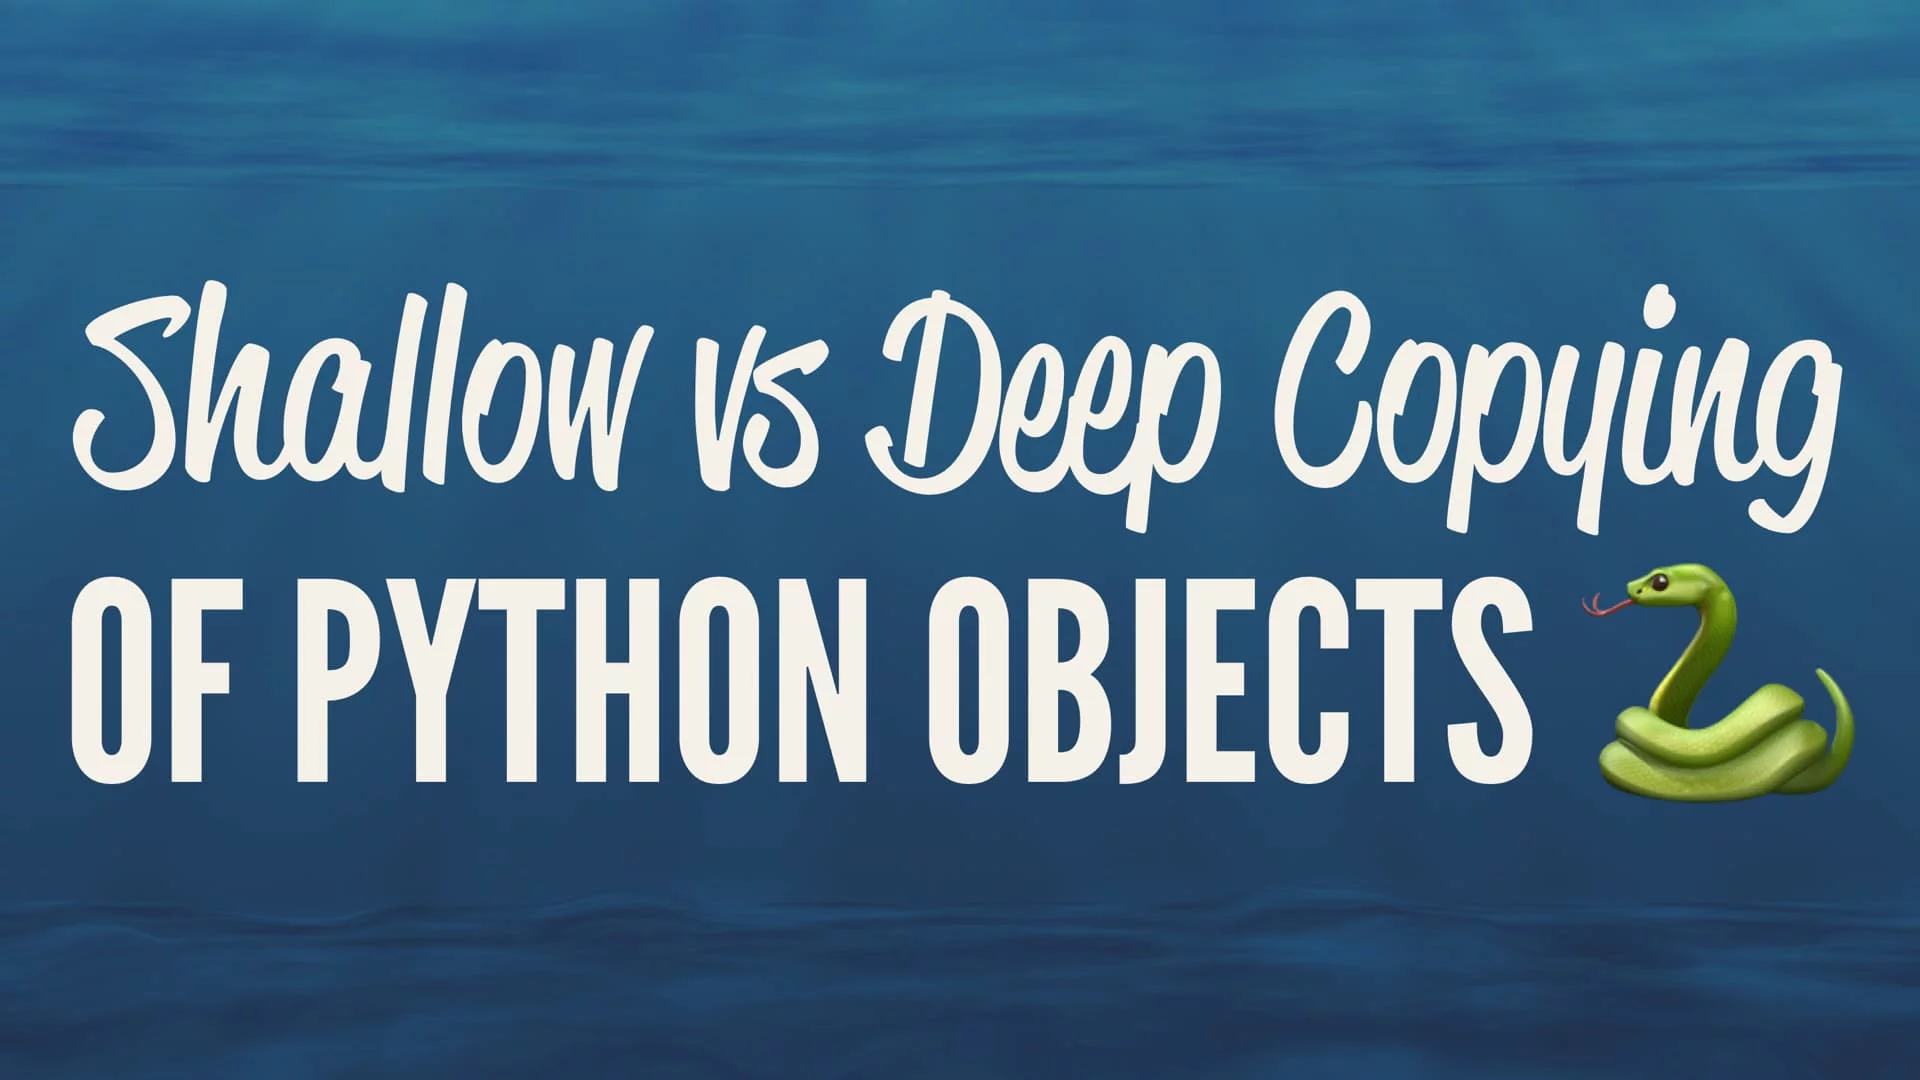
图片来源：https://realpython.com/copying-python-objects/

本文参考于[RealPython](https://realpython.com/copying-python-objects/)

在Python中使用赋值语句为一个对象赋予名称时，亦或是通过赋值语句更改一个已创建对象的内容时，并未产生任何的复制操作，此时仅仅将变量名称与相应的对象进行绑定，或者理解为有个指针指向了创建的对象。

对于不可变类型(`tuple, str, frozenset`)，修改他们会总会开辟新的内存空间，赋值即为复制，因此可说浅复制和深复制在不可变类型上是一样的（或者说只有深复制）。而对于可变类型(`list, dictionary， set `)，浅复制和深复制就有所区别。

在编写代码时，我们可能需要创建一个对象的副本，在副本上动动手脚，做做实验，而不希望改变原对象。那么如何做到这一点呢？

先以创建Python内置的可变类型的副本为例
```
new_list = list(original_list)
new_dict = dict(original_dict)
new_set = set(original_set)
 ```
 使用这种方法只会进行对象的浅复制，而且也无法对用户自定义的对象进行复制。
 我们先来看看深浅复制各自的定义。
 >  * A __shallow copy__ means constructing a new collection object and then populating it with references to the child objects found in the original. In essence, a shallow copy is only one level deep. The copying process does not recurse and therefore won’t create copies of the child objects themselves. 
 
> * A __deep copy__ makes the copying process recursive. It means first constructing a new collection object and then recursively populating it with copies of the child objects found in the original. Copying an object this way walks the whole object tree to create a fully independent clone of the original object and all of its children.

**简言之，浅复制仅针对对象的外围进行复制，深复制会对由表及里地对对象进行复制，实质上，深复制是不断递归地进行浅复制。从最终的效果来看，浅复制产生的对象与原对象纠缠不清，深复制产生的对象相对于原对象完全对立，各自占有各自的内存空间，互相独立。**

---

# 浅复制

### 如果对象比较简单，无内部对象或者无子对象，浅复制即深复制，对象与对象副本是独立的。

In [9]:
a = [1,2,3,4]
b = list(a) # 或 b = a[:]

In [10]:
id(a) == id(b)

False

In [11]:
a.append(10)
print(a)
print(b)

[1, 2, 3, 4, 10]
[1, 2, 3, 4]


### 再拿嵌套的列表为例：

In [17]:
x = [[1,2,3],[4,5,6],[7,8,9]]
y = list(x) #  y = x[:] 亦可
print("The value of x is:",x)
print("The value of y is:",y)

The value of x is: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
The value of y is: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


为了验证x和y是否独立，我们对`x`做一些修改，看是否会影响到`y`。

In [21]:
x.append(["new element"])
print("The value of x is:",x)
print("The value of y is:",y)

The value of x is: [[1, 2, 3], [4, 5, 6], [7, 8, 9], ['new element']]
The value of y is: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [23]:
id(x[1][0]) == id(y[1][0])

True

从表面来看，修改x并未影响到y，但**这是因为我们并没有修改内部对象。

`y`仅仅是`x`的外围复制，对于存储在`x`内部的子类对象（即内部的三个列表元素），其实是与`y`所包含的子类对象是共享的,其引用指向内存的同一块地址。**如果我们修改`x`的内部列表元素（即修改`x`的子对象），看看会发生什么。

In [22]:
x[1][0] = 'second change'
print("The value of x is:",x)
print("The value of y is:",y)

The value of x is: [[1, 2, 3], ['second change', 5, 6], [7, 8, 9], ['new element']]
The value of y is: [[1, 2, 3], ['second change', 5, 6], [7, 8, 9]]


在这个例子中，虽然我们仅仅对`x`做改变，但相信聪明的你能发现，如果改变`y`, `x`也会跟着变化。
这就是浅复制和深复制的不同所在。

1. 那么如何创建对象的深复制呢？

2. 又如何创建自定义对象的深复制和浅复制呢？

**Python的标准库提供`copy`模块，使用此模块提供的方法即可随意进行浅复制和深复制操作。**

# 深复制

In [26]:
import copy
x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
z = copy.deepcopy(x)
x[1][0] = "new element"
print("The value of x:",x)
print("The value of z:",z)

The value of x: [[1, 2, 3], ['new element', 5, 6], [7, 8, 9]]
The value of z: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


在这个例子中，使用`copy.deepcopy()`方法的到的副本，与原对象完全独立，无论如何改变，也不会影响原对象。另外，`copy`模块提供了`copy.copy()`来创建对象的浅复制。

# 复制用户自定义创建的对象

首先定义一个二维平面的点类，初始化方法接受两个参数，坐标x和坐标y。

实例化一个点对象，再对其进行浅复制。

用`is()`判断是否为同一对象。

In [41]:
class Point():
    def __init__(self, x, y):
        self.x = [x]
        self.y = [y]
    def __repr__(self):
        return f"Point({self.x!r}, {self.y!r})"

In [45]:
p1 = Point(24, 52)
p2= copy.copy(p1)
print(p1)
print(p2)
p1 is p2

Point([24], [52])
Point([24], [52])


False

由于没有子对象，此处浅复制即深复制。

为了实现对象的嵌套，我们需要再定义一个矩形类，初始化参数为Point的两个对象，分别作为矩形的左上角和右下角坐标。

In [46]:
class Rectangle():
    def __init__(self, topleft, bottomright):
        self.topleft = topleft
        self.bottomright = bottomright
    def __repr__(self):
        return (f"Rectangle({self.topleft!r}, {self.bottomright!r})")

In [48]:
rect1 = Rectangle(Point(0, 1), Point(5, 6))
rect2 = copy.copy(rect1)
print(rect1)
print(rect2)
rect1 is rect2

Rectangle(Point([0], [1]), Point([5], [6]))
Rectangle(Point([0], [1]), Point([5], [6]))


False

In [49]:
rect2.topleft.x = 100
print(rect1)
print(rect2)

Rectangle(Point(100, [1]), Point([5], [6]))
Rectangle(Point(100, [1]), Point([5], [6]))


显而易见，浅复制并未复制原对象的所包含的子对象。再看看关于深复制的程序。

关于复制还有更多的内容可以挖掘，参考[copy module documentation](https://docs.python.org/3/library/copy.html)。例如，我们可以通过定义`__copy__()`和`__deepcopy__()`方法来决定对象在被复制时是深复制还是浅复制。

In [51]:
rect3 = copy.deepcopy(rect1)
rect3.topleft.x = 333
print(rect1)
print(rect3)

Rectangle(Point(100, [1]), Point([5], [6]))
Rectangle(Point(333, [1]), Point([5], [6]))


# 总结


* 浅复制不会对对象所包含的子对象进行复制，因此对象副本并未完全独立于原对象。
* 深复制会进入原对象内部逐一进行复制，此时得到的副本完全独立于原对象，因此深复制会消耗更多的时间。
* 通过Python内置的`copy`模块我们可以复制任意对象。